In [65]:
import pandas as pd
# calendar = pd.read_csv('calendar.csv.gz')
# listings = pd.read_csv('listings.csv')
listings2 = pd.read_csv('listings.csv.gz', low_memory=False)
# neighborhoods = pd.read_csv('neighbourhoods.csv')
# neighborhoods_geojson = pd.read_csv('neighbourhoods.geojson')
# reviews = pd.read_csv('reviews.csv')
# reviews2 = pd.read_csv('reviews.csv.gz')


In [66]:
listings2.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [67]:
listings_short = listings2.filter(['price','beds', 'bathrooms',"cleaning_fee",'accommodates','property_type','neighbourhood','neighbourhood_group_cleansed','zipcode','review_scores_rating', 'room_type','number_of_reviews' ], axis=1)

In [68]:
listings_short.head(10)

,price,beds,bathrooms,cleaning_fee,accommodates,property_type,neighbourhood,neighbourhood_group_cleansed,zipcode,review_scores_rating,room_type,number_of_reviews
0,$59.00,1.0,NaN,$95.00,2,Apartment,NaN,Brooklyn,11221,73.0,Private room,14
1,$59.00,3.0,1.0,$60.00,3,Apartment,Harlem,Manhattan,10026,93.0,Private room,174
2,$149.00,3.0,1.0,$25.00,4,Apartment,Kensington,Brooklyn,11218,98.0,Private room,9
3,$225.00,1.0,1.0,$100.00,2,Apartment,Midtown,Manhattan,10018,95.0,Entire home/apt,38
4,$89.00,1.0,1.0,$60.00,4,House,Red Hook,Brooklyn,11231,79.0,Private room,22
5,$70.00,1.0,1.0,$125.00,2,Apartment,Williamsburg,Brooklyn,11206,98.0,Private room,36
6,$200.00,4.0,2.0,$140.00,8,Condominium,Prospect Heights,Brooklyn,11238,99.0,Entire home/apt,140
7,$150.00,1.0,1.0,$75.00,2,Apartment,Harlem,Manhattan,10027,NaN,Private room,0
8,$89.00,3.0,1.0,NaN,3,Guest suite,Clinton Hill,Brooklyn,11238,91.0,Entire home/apt,217
9,$55.00,2.0,1.0,$25.00,2,Apartment,Clinton Hill,Brooklyn,11205,92.0,Private room,27


In [69]:
import requests

r = requests.get("http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz188d4jlv3m3_9k5bc&state=ny&city=new_york&childtype=zipcode")
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content)
zip_zindex = soup.findAll(['name', 'zindex'])
zipcode_list = soup.findAll('name')
median_prices_list = soup.findAll('zindex')


In [70]:
zipcodes={}
for element in zip_zindex:
    if element in zipcode_list:
        zipcodes[element.contents[0]]={'zipcode':element.contents}
        lastzip = element.contents
    if element in median_prices_list:
        zipcodes[lastzip[0]]={'med_zillow_price': element.contents[0]}


In [71]:
zipcodes

{'10025': {'med_zillow_price': '1034300'},
 '10023': {'zipcode': ['10023']},
 '10002': {'med_zillow_price': '877400'},
 '10467': {'med_zillow_price': '310500'},
 '11226': {'med_zillow_price': '633400'},
 '10016': {'zipcode': ['10016']},
 '11375': {'med_zillow_price': '770800'},
 '11235': {'med_zillow_price': '578700'},
 '10029': {'med_zillow_price': '719400'},
 '10009': {'med_zillow_price': '1051700'},
 '10011': {'zipcode': ['10011']},
 '10128': {'zipcode': ['10128']},
 '11201': {'med_zillow_price': '986200'},
 '10462': {'med_zillow_price': '104300'},
 '10456': {'med_zillow_price': '254600'},
 '11206': {'zipcode': ['11206']},
 '10003': {'med_zillow_price': '1410600'},
 '10463': {'med_zillow_price': '509700'},
 '11212': {'med_zillow_price': '312000'},
 '11230': {'med_zillow_price': '839000'},
 '11209': {'med_zillow_price': '825900'},
 '10024': {'zipcode': ['10024']},
 '11221': {'med_zillow_price': '728600'},
 '11214': {'med_zillow_price': '588100'},
 '10019': {'zipcode': ['10019']},
 '1

In [72]:
import pandas as pd
df = pd.DataFrame(zipcodes)
data = df.T
data["zip"]=data.index
data2 = data.drop(columns = 'zipcode')

In [73]:
full_data = data2.set_index('zip').join(listings_short.set_index('zipcode'))

In [74]:
full_data.head()

,med_zillow_price,price,beds,bathrooms,cleaning_fee,accommodates,property_type,neighbourhood,neighbourhood_group_cleansed,review_scores_rating,room_type,number_of_reviews
10001,2188500,$150.00,3.0,1.0,$45.00,4.0,Apartment,Chelsea,Manhattan,89.0,Entire home/apt,394.0
10001,2188500,$123.00,1.0,1.0,$39.00,2.0,Apartment,Chelsea,Manhattan,92.0,Private room,356.0
10001,2188500,$130.00,1.0,1.0,NaN,2.0,Apartment,Chelsea,Manhattan,96.0,Entire home/apt,19.0
10001,2188500,$239.00,1.0,1.0,$125.00,2.0,Apartment,NaN,Manhattan,99.0,Entire home/apt,26.0
10001,2188500,$400.00,1.0,1.0,$175.00,3.0,Apartment,NaN,Manhattan,96.0,Entire home/apt,26.0


In [75]:
import seaborn as sns
removed_null = full_data.dropna()

In [76]:
airbnb = full_data.dropna()

airbnb['price'] = airbnb.price.replace('[\$,]', '', regex=True).astype(float)
airbnb['cleaning_fee'] = airbnb.price.replace('[\$,]', '', regex=True).astype(float)
airbnb['med_zillow_price'] = airbnb.med_zillow_price.apply(pd.to_numeric, errors='coerce')
airbnb['borough'] = airbnb['neighbourhood_group_cleansed']
airbnb.drop(columns = ['neighbourhood_group_cleansed'])
airbnb.dtypes

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

med_zillow_price                  int64
price                           float64
beds                            float64
bathrooms                       float64
cleaning_fee                    float64
accommodates                    float64
property_type                    object
neighbourhood                    object
neighbourhood_group_cleansed     object
review_scores_rating            float64
room_type                        object
number_of_reviews               float64
borough                          object
dtype: object

In [77]:
airbnb.price.describe()

count    19509.000000
mean       140.713824
std        231.248524
min          0.000000
25%         69.000000
50%        100.000000
75%        165.000000
max      10000.000000
Name: price, dtype: float64

In [78]:
airbnb.borough.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [79]:
#Takes all neighborhoods with more than 200 listings
airbnb = airbnb.groupby('neighbourhood').filter(lambda x: len(x) >= 100)
#Takes all property types with more than 50 listings
airbnb = airbnb.groupby('property_type').filter(lambda x: len(x) >= 50)

In [80]:
airbnb.price.describe()

count    16568.000000
mean       141.790319
std        232.093645
min          0.000000
25%         70.000000
50%        108.000000
75%        167.000000
max      10000.000000
Name: price, dtype: float64

In [81]:
airbnb.borough.unique()

array(['Manhattan', 'Brooklyn', 'Queens'], dtype=object)

In [82]:
airbnb['property_type'].value_counts()

Apartment             13192
House                  1409
Townhouse               742
Loft                    573
Condominium             445
Guest suite             106
Serviced apartment      101
Name: property_type, dtype: int64

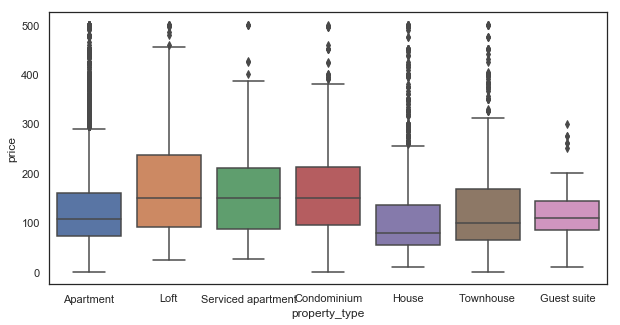

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='price', x='property_type', data = airbnb.loc[airbnb['price'] <= 500.00])
#plt.rcParams['figure.figsize']=(5,5)

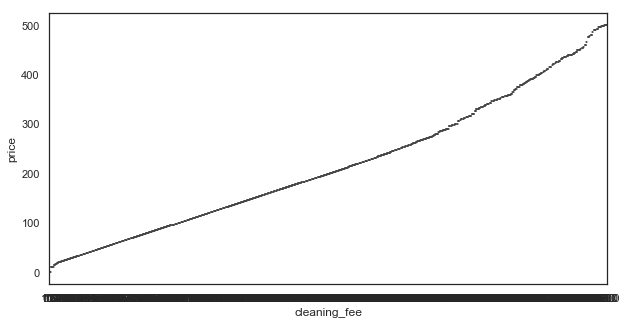

In [152]:
sns.boxplot(y='price', x='cleaning_fee', data = airbnb.loc[airbnb['price'] <= 500.00])
plt.rcParams['figure.figsize']=(20,20)
plt.show();

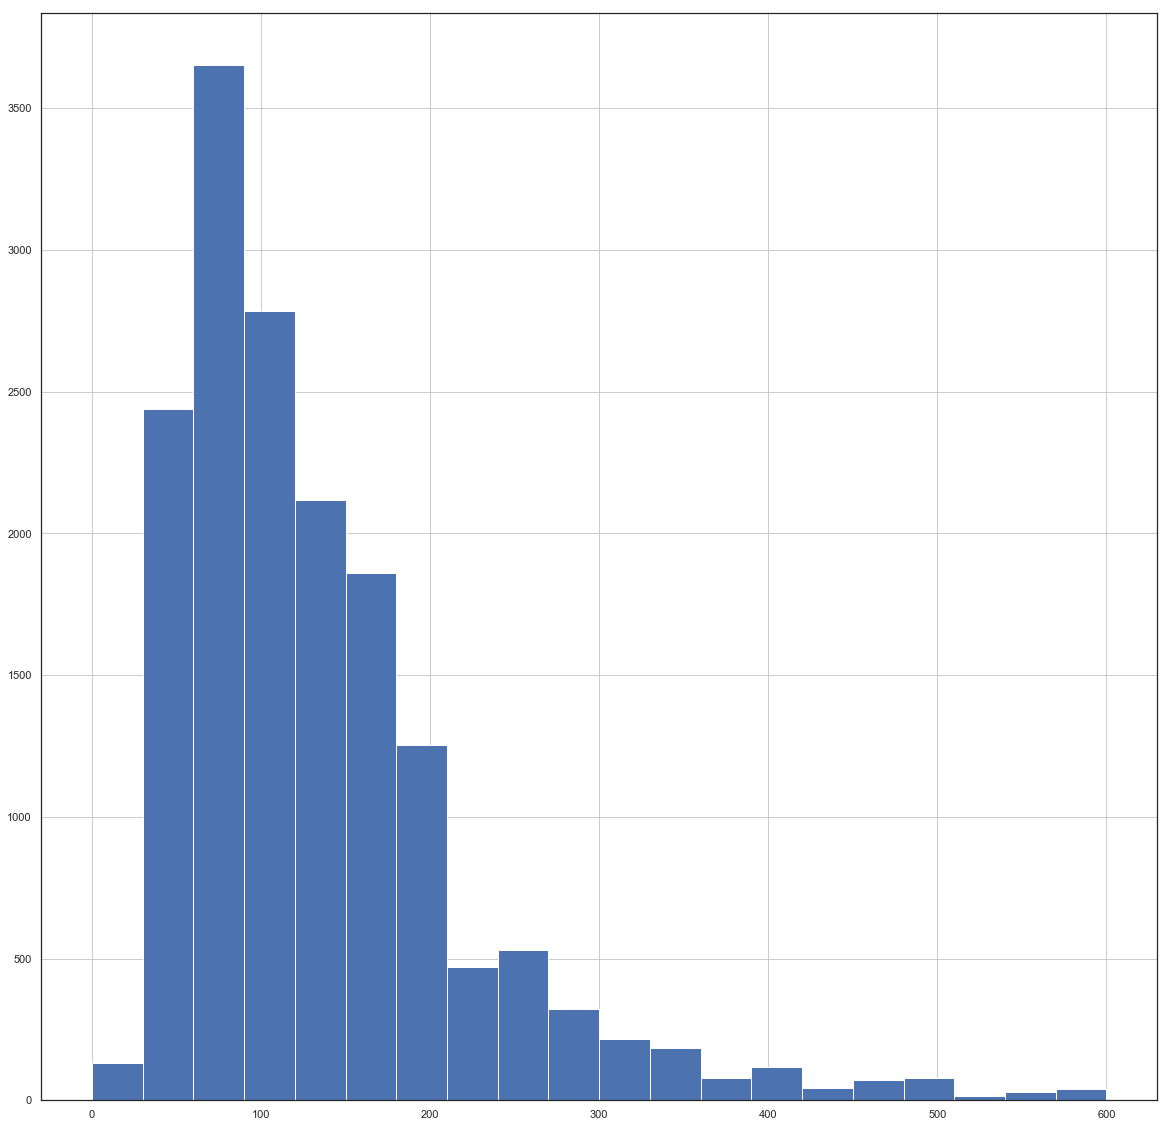

In [85]:
#price distrobution for AirBnB rentals less than $600
airbnb['price'].loc[airbnb['price'] <= 600.00].hist(bins=20)
plt.rcParams['figure.figsize']=(10,5)

In [86]:
full_data.corr()

,beds,bathrooms,accommodates,review_scores_rating,number_of_reviews
beds,1.000000,0.380149,0.788470,-0.023016,0.090228
bathrooms,0.380149,1.000000,0.342352,-0.005378,-0.017352
accommodates,0.788470,0.342352,1.000000,-0.015865,0.106964
review_scores_rating,-0.023016,-0.005378,-0.015865,1.000000,0.016059
number_of_reviews,0.090228,-0.017352,0.106964,0.016059,1.000000


In [87]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]
    
def remove_spaces(dataframe):
    dataframe.columns = [x.replace(" ","") for x in dataframe.columns]
    
remove_apostrophe(airbnb)
remove_period(airbnb)
remove_dash(airbnb)
remove_slash(airbnb)
remove_spaces(airbnb)

In [88]:
abs(airbnb.corr())>0.75

,med_zillow_price,price,beds,bathrooms,cleaning_fee,accommodates,review_scores_rating,number_of_reviews
med_zillow_price,True,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False
beds,False,False,True,False,False,True,False,False
bathrooms,False,False,False,True,False,False,False,False
cleaning_fee,False,True,False,False,True,False,False,False
accommodates,False,False,True,False,False,True,False,False
review_scores_rating,False,False,False,False,False,False,True,False
number_of_reviews,False,False,False,False,False,False,False,True


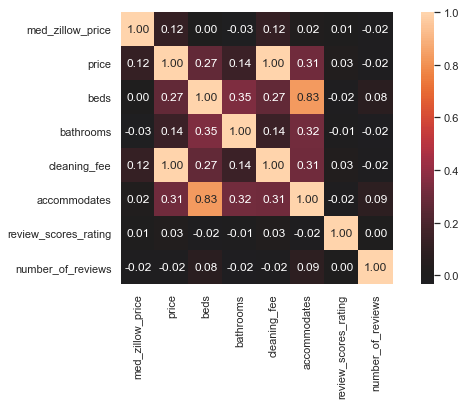

In [89]:
sns.heatmap(airbnb.corr(), center=0, cbar = True, annot=True, square = True, fmt = '.2f');


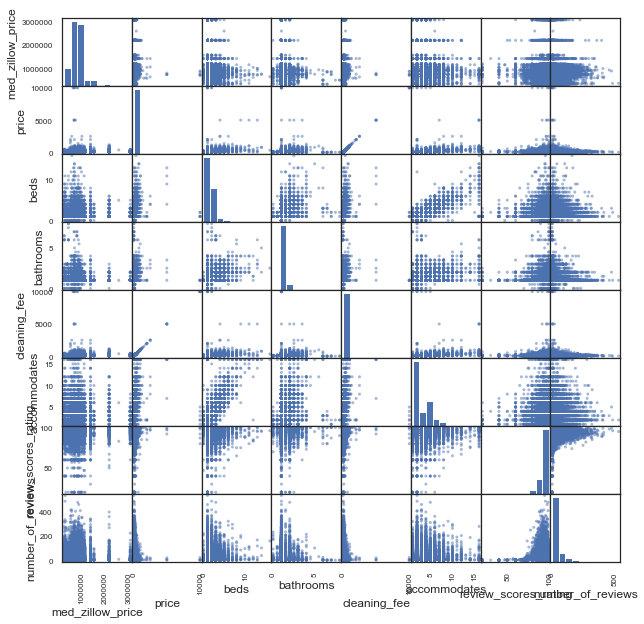

In [90]:
pd.plotting.scatter_matrix(airbnb,figsize  = [10, 10]);

In [91]:
#Get dummy variables for all of our categorial variables. That's neighborhoods, boroughs, and property_types
neighborhoods = pd.get_dummies(airbnb["neighbourhood"], prefix="hood", drop_first = True)
boroughs = pd.get_dummies(airbnb['borough'], prefix = "borough", drop_first = True)
property_type = pd.get_dummies(airbnb['property_type'], prefix = "type", drop_first = True)
beds = airbnb['beds']
bathrooms = airbnb['bathrooms']
cleaning_fee = airbnb['cleaning_fee']
price = airbnb['price']
med_zillow_price = airbnb['med_zillow_price']
accommodates = airbnb['accommodates']
review_scores_rating = airbnb['review_scores_rating']
number_of_reviews = airbnb['number_of_reviews']
#create a dataframe with categorial dummy variables and numerical variables
data_fin = pd.concat([boroughs, neighborhoods, property_type, price, beds, bathrooms, cleaning_fee, med_zillow_price, accommodates, review_scores_rating, number_of_reviews], axis=1)

In [92]:
data_fin.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_Bay Ridge,hood_Bedford-Stuyvesant,hood_Boerum Hill,hood_Bushwick,hood_Carroll Gardens,hood_Chelsea,hood_Chinatown,...,type_Serviced apartment,type_Townhouse,price,beds,bathrooms,cleaning_fee,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,150.0,3.0,1.0,150.0,2188500,4.0,89.0,394.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,123.0,1.0,1.0,123.0,2188500,2.0,92.0,356.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,250.0,1.0,1.0,250.0,2188500,2.0,96.0,18.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,226.0,2.0,1.0,226.0,2188500,2.0,90.0,26.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,225.0,2.0,1.0,225.0,2188500,4.0,95.0,53.0


In [93]:
def remove_apostrophe(dataframe):
    dataframe.columns = [x.replace("'","") for x in dataframe.columns]
    
def remove_period(dataframe):
    dataframe.columns = [x.replace(".","") for x in dataframe.columns]
    
def remove_dash(dataframe):
    dataframe.columns = [x.replace("-","") for x in dataframe.columns]
    
def remove_slash(dataframe):
    dataframe.columns = [x.replace("/","") for x in dataframe.columns]

def remove_spaces(dataframe):
    dataframe.columns = [x.replace(" ","") for x in dataframe.columns]
    
remove_apostrophe(data_fin)
remove_period(data_fin)
remove_dash(data_fin)
remove_slash(data_fin)
remove_spaces(data_fin)

In [94]:
outcome = 'price'
predictors = data_fin.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + " ~ " + pred_sum

# model2.summary()

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
#Uses the Feature Ranking w/ Recursive Feature Elimination Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Choose n top features based on p-values
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(predictors, data_fin["price"])

In [97]:
#Responds with variables and whether they meet top n features or not
selector.support_ 

array([False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

In [98]:
#Responds with ranking of variables
selector.ranking_

array([44,  1,  2,  5,  1,  4,  3,  1,  1, 27, 30, 23,  6, 20, 15, 14, 16,
       35, 11, 38, 28, 10,  9, 31, 25, 12, 39,  8, 37, 46, 19,  7, 32, 45,
       18, 33, 43, 17, 42, 41, 40, 34, 29, 48, 21, 36, 26, 22, 13, 24,  1,
       50, 47, 49, 51])

In [99]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 8.13209213e-13  7.64943664e-13 -4.94236705e-13 -3.04727028e-12
  1.00000000e+00]
-2.2453150450019166e-12


In [100]:
#Next thing to do is figure out an automated way to train just the "yes" variables
#Google model fitting using feature ranking!!

In [101]:
features = data_fin.drop('price', axis=1)
target = data_fin.price

In [102]:
data_fin.columns

Index(['borough_Manhattan', 'borough_Queens', 'hood_Astoria', 'hood_BayRidge',
       'hood_BedfordStuyvesant', 'hood_BoerumHill', 'hood_Bushwick',
       'hood_CarrollGardens', 'hood_Chelsea', 'hood_Chinatown',
       'hood_ClintonHill', 'hood_CrownHeights', 'hood_EastFlatbush',
       'hood_EastHarlem', 'hood_EastNewYork', 'hood_EastVillage',
       'hood_Elmhurst', 'hood_FinancialDistrict', 'hood_Flatbush',
       'hood_Flushing', 'hood_FortGreene', 'hood_Gowanus', 'hood_GramercyPark',
       'hood_Greenpoint', 'hood_GreenwoodHeights', 'hood_HamiltonHeights',
       'hood_Harlem', 'hood_HellsKitchen', 'hood_JacksonHeights',
       'hood_Jamaica', 'hood_LeffertsGarden', 'hood_LongIslandCity',
       'hood_LowerEastSide', 'hood_MorningsideHeights', 'hood_ParkSlope',
       'hood_ProspectHeights', 'hood_Ridgewood', 'hood_SunsetPark',
       'hood_TheRockaways', 'hood_UpperWestSide', 'hood_Williamsburg',
       'hood_WindsorTerrace', 'type_Condominium', 'type_Guestsuite',
       'type_H

In [103]:
data_fin.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_Bushwick,hood_CarrollGardens,hood_Chelsea,hood_Chinatown,...,type_Servicedapartment,type_Townhouse,price,beds,bathrooms,cleaning_fee,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,150.0,3.0,1.0,150.0,2188500,4.0,89.0,394.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,123.0,1.0,1.0,123.0,2188500,2.0,92.0,356.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,250.0,1.0,1.0,250.0,2188500,2.0,96.0,18.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,226.0,2.0,1.0,226.0,2188500,2.0,90.0,26.0
10001,1,0,0,0,0,0,0,0,1,0,...,0,0,225.0,2.0,1.0,225.0,2188500,4.0,95.0,53.0


In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [105]:
#Create training and testing set. Training is 80% of entire set
features = data_fin.drop('price', axis=1)
target = data_fin.price
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)

lm = linear_model.LinearRegression()
model_base = lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.5611942896471336e-12
3.13926256367018e-23
5.602912246029006e-12


In [107]:
X_train.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_Bushwick,hood_CarrollGardens,hood_Chelsea,hood_Chinatown,...,type_Loft,type_Servicedapartment,type_Townhouse,beds,bathrooms,cleaning_fee,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.0,1.0,65.0,921800,4.0,95.0,4.0
10025,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1.0,70.0,1034300,1.0,80.0,1.0
11210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.0,1.5,150.0,604100,5.0,98.0,39.0
11217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1.0,120.0,984900,3.0,98.0,21.0
11205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1.0,110.0,747900,3.0,100.0,5.0


In [108]:
from sklearn import preprocessing
from sklearn import pipeline
#Create training and testing set. Training is 80% of entire set
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)
scaler = preprocessing.StandardScaler()
#Take out all categorical variables, because there's no point in scaling 1's and 0's
scaler.fit(X_train.iloc[:,-7:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [112]:
X_train.columns[-7:]

Index(['beds', 'bathrooms', 'cleaning_fee', 'med_zillow_price', 'accommodates',
       'review_scores_rating', 'number_of_reviews'],
      dtype='object')

In [113]:
#Create a new dataframe with new scaled numerical variables
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,-7:]), columns=X_train.columns[-7:], index = X_train.index)


#Add back in your categorical variables
features_scaled_train = pd.concat([X_train.iloc[:,:-7],features_scaled_train], axis=1)


features_scaled_train.head()

#if there's a value less than the mean, the scaled number will be negative. This is because the scaled number
#is z= (x-u)/s.
#x = value
#u = mean of training samples
#s = standard deviation

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_Bushwick,hood_CarrollGardens,hood_Chelsea,hood_Chinatown,...,type_Loft,type_Servicedapartment,type_Townhouse,beds,bathrooms,cleaning_fee,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.286090,-0.336649,-0.312511,0.199549,0.464691,0.120295,-0.598813
10025,1,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.583798,-0.336649,-0.292522,0.538156,-1.049697,-1.895710,-0.663704
11210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.025867,0.774948,0.027309,-0.756677,0.969488,0.523496,0.158245
11217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.583798,-0.336649,-0.092627,0.389470,-0.040105,0.523496,-0.231099
11205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.583798,-0.336649,-0.132606,-0.323862,-0.040105,0.792297,-0.577183


In [114]:
X_test.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_Bushwick,hood_CarrollGardens,hood_Chelsea,hood_Chinatown,...,type_Loft,type_Servicedapartment,type_Townhouse,beds,bathrooms,cleaning_fee,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11385,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1.5,37.0,487800,1.0,100.0,1.0
11238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1.0,250.0,786400,3.0,99.0,61.0
10005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1.0,250.0,1182900,2.0,100.0,1.0
11370,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1.0,1.0,47.0,529900,2.0,97.0,67.0
11215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.0,1.0,125.0,921800,4.0,100.0,92.0


In [115]:
#Create a new dataframe with new scaled numerical variables
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,-7:]), columns=X_train.columns[-7:], index = X_test.index)


#Add back in your categorical variables
features_scaled_test = pd.concat([X_test.iloc[:,:-7],features_scaled_test], axis=1)

features_scaled_test.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_Bushwick,hood_CarrollGardens,hood_Chelsea,hood_Chinatown,...,type_Loft,type_Servicedapartment,type_Townhouse,beds,bathrooms,cleaning_fee,med_zillow_price,accommodates,review_scores_rating,number_of_reviews
11385,0,1,0,0,0,0,0,0,0,0,...,0,0,0,-0.583798,0.774948,-0.424452,-1.106722,-1.049697,0.792297,-0.663704
11238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.583798,-0.336649,0.427098,-0.207984,-0.040105,0.657896,0.634109
10005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,-0.583798,-0.336649,0.427098,0.985418,-0.544901,0.792297,-0.663704
11370,0,1,0,0,0,0,0,0,0,0,...,0,0,0,-0.583798,-0.336649,-0.384474,-0.980008,-0.544901,0.389096,0.763891
11215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2.025867,-0.336649,-0.072638,0.199549,0.464691,0.792297,1.304646


In [116]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_many_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
features_many_train.head()
#preprocessing.PolynomialFeatures = Generate polynomial and interaction features.
#Generate a new feature matrix consisting of all polynomial combinations of the features with 
#degree less than or equal to the specified degree. For example, if an input sample is two dimensional 
#and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
#poly.fit_transform = Fit to data, then transform it.

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_Bushwick,hood_CarrollGardens,hood_Chelsea,hood_Chinatown,...,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,med_zillow_price number_of_reviews,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews,review_scores_rating^2,review_scores_rating number_of_reviews,number_of_reviews^2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039820,0.092729,0.024005,-0.119492,0.215938,0.055900,-0.278263,0.014471,-0.072034,0.358577
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.289612,-0.564901,-1.020187,-0.357176,1.101865,1.989922,0.696688,3.593715,1.258189,0.440502
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.572561,-0.733589,-0.396118,-0.119740,0.939906,0.507523,0.153416,0.274048,0.082840,0.025041
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.151687,-0.015620,0.203886,-0.090006,0.001608,-0.020995,0.009268,0.274048,-0.120980,0.053407
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.104887,0.012988,-0.256595,0.186928,0.001608,-0.031775,0.023148,0.627734,-0.457300,0.333140


In [131]:
features_many_test = pd.DataFrame(poly.fit_transform(features_scaled_test), columns=poly.get_feature_names(features_scaled_test.columns))
features_many_test.head()

,borough_Manhattan,borough_Queens,hood_Astoria,hood_BayRidge,hood_BedfordStuyvesant,hood_BoerumHill,hood_Bushwick,hood_CarrollGardens,hood_Chelsea,hood_Chinatown,...,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,med_zillow_price number_of_reviews,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews,review_scores_rating^2,review_scores_rating number_of_reviews,number_of_reviews^2
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.224833,1.161723,-0.876852,0.734535,1.101865,-0.831672,0.696688,0.627734,-0.525850,0.440502
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043257,0.008341,-0.136832,-0.131884,0.001608,-0.026385,-0.025431,0.432828,0.417178,0.402095
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.971049,-0.536955,0.780743,-0.654025,0.296917,-0.431723,0.361653,0.627734,-0.525850,0.440502
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.960415,0.534007,-0.381317,-0.748619,0.296917,-0.212019,-0.416245,0.151395,0.297227,0.583529
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039820,0.092729,0.158102,0.260340,0.215938,0.368173,0.606258,0.627734,1.033667,1.702101


In [132]:
from sklearn.feature_selection import VarianceThreshold

#Feature selector that removes all low-variance features.
#This feature selection algorithm looks only at the features (X), not the desired outputs (y), 
#and can thus be used for unsupervised learning.

thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


In [133]:
features_selected_train = variance_threshold_selector(features_many_train)

In [134]:
# features_selected_train.head()
len(features_selected_train.columns)

34

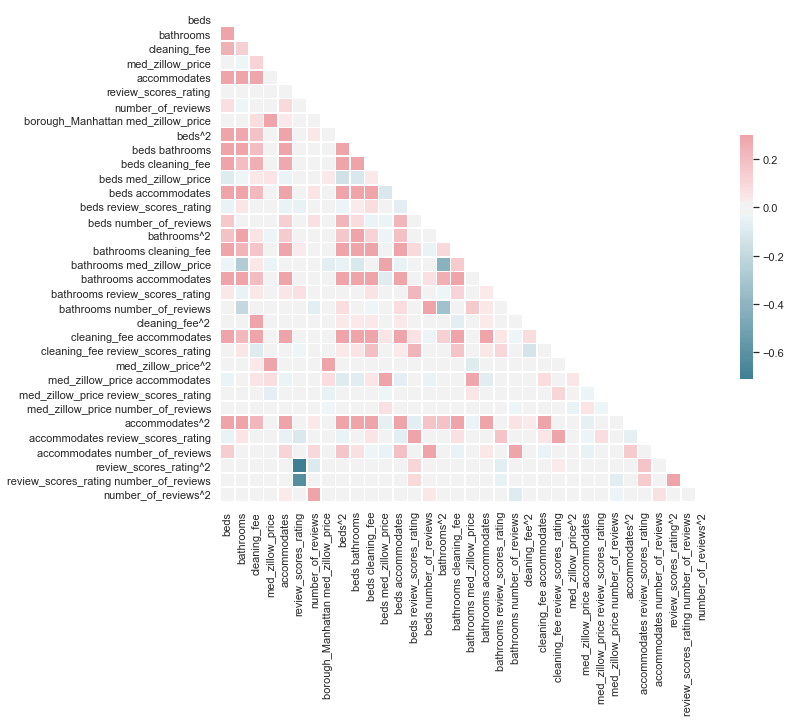

In [135]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix between selected features that have high variance
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [136]:
# Create correlation matrix, take absolute values of each correlation
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [137]:
upper

,beds,bathrooms,cleaning_fee,med_zillow_price,accommodates,review_scores_rating,number_of_reviews,borough_Manhattan med_zillow_price,beds^2,beds bathrooms,...,med_zillow_price^2,med_zillow_price accommodates,med_zillow_price review_scores_rating,med_zillow_price number_of_reviews,accommodates^2,accommodates review_scores_rating,accommodates number_of_reviews,review_scores_rating^2,review_scores_rating number_of_reviews,number_of_reviews^2
beds,NaN,0.352389,0.250168,0.000336,0.824008,0.017091,0.074483,0.016027,0.711776,0.522155,...,0.012791,0.041894,0.013684,0.011071,0.607682,0.049678,0.141096,0.010855,0.002436,0.020833
bathrooms,NaN,NaN,0.131363,0.034543,0.320577,0.015660,0.032746,0.015368,0.286774,0.507295,...,0.009546,0.007662,0.013032,0.011291,0.316158,0.047506,0.002864,0.013321,0.005988,0.018202
cleaning_fee,NaN,NaN,NaN,0.114548,0.288180,0.024859,0.019987,0.081916,0.182150,0.202104,...,0.035531,0.052272,0.006557,0.004906,0.221468,0.008064,0.023054,0.006132,0.007960,0.015822
med_zillow_price,NaN,NaN,NaN,NaN,0.025194,0.007218,0.018371,0.886103,0.019814,0.014455,...,0.690722,0.079817,0.065724,0.014338,0.012938,0.018328,0.021337,0.002991,0.025562,0.002715
accommodates,NaN,NaN,NaN,NaN,NaN,0.017576,0.090690,0.033456,0.538617,0.448016,...,0.019296,0.041514,0.017840,0.022182,0.715985,0.052291,0.112140,0.020892,0.012067,0.027824
review_scores_rating,NaN,NaN,NaN,NaN,NaN,NaN,0.005243,0.019819,0.010217,0.018553,...,0.016058,0.018030,0.013999,0.018024,0.016032,0.100447,0.008185,0.710736,0.623271,0.004327
number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010135,0.041283,0.000957,...,0.003580,0.022908,0.018418,0.009887,0.037521,0.008932,0.097446,0.095956,0.022345,0.776347
borough_Manhattan med_zillow_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008387,0.013825,...,0.858937,0.080553,0.053387,0.027763,0.000241,0.013596,0.020616,0.006770,0.021273,0.003793
beds^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699552,...,0.003950,0.085397,0.004631,0.006187,0.706561,0.049653,0.168948,0.004133,0.004857,0.015279
beds bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009753,0.081587,0.004927,0.001123,0.617635,0.006993,0.062944,0.011927,0.005094,0.001576


In [138]:
#SelectKBest = Select features according to the k highest scores.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [139]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [140]:
test = SelectKBest(score_func=mutual_info_regression, k=13)
fit = test.fit(features_selected_train, y_train)

In [141]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

,cleaning_fee,accommodates,beds cleaning_fee,beds med_zillow_price,beds accommodates,bathrooms cleaning_fee,bathrooms accommodates,cleaning_fee^2,cleaning_fee accommodates,cleaning_fee review_scores_rating,med_zillow_price accommodates,accommodates^2,accommodates review_scores_rating
0,-0.312511,0.464691,-0.089407,0.057089,0.132944,0.105207,-0.156438,0.097663,-0.145221,-0.037594,0.092729,0.215938,0.055900
1,-0.292522,-1.049697,0.170774,-0.314174,0.612811,0.098477,0.353380,0.085569,0.307060,0.554537,-0.564901,1.101865,1.989922
2,0.027309,0.969488,0.055325,-1.532928,1.964053,0.021163,0.751302,0.000746,0.026476,0.014296,-0.733589,0.939906,0.507523
3,-0.092627,-0.040105,0.054076,-0.227372,0.023413,0.031183,0.013501,0.008580,0.003715,-0.048490,-0.015620,0.001608,-0.020995
4,-0.132606,-0.040105,0.077415,0.189070,0.023413,0.044642,0.013501,0.017584,0.005318,-0.105064,0.012988,0.001608,-0.031775


In [142]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=13)

In [143]:
features_selected_train.head()

,cleaning_fee,accommodates,beds cleaning_fee,beds med_zillow_price,beds accommodates,bathrooms cleaning_fee,bathrooms accommodates,cleaning_fee^2,cleaning_fee accommodates,cleaning_fee review_scores_rating,med_zillow_price accommodates,accommodates^2,accommodates review_scores_rating
0,-0.312511,0.464691,-0.089407,0.057089,0.132944,0.105207,-0.156438,0.097663,-0.145221,-0.037594,0.092729,0.215938,0.055900
1,-0.292522,-1.049697,0.170774,-0.314174,0.612811,0.098477,0.353380,0.085569,0.307060,0.554537,-0.564901,1.101865,1.989922
2,0.027309,0.969488,0.055325,-1.532928,1.964053,0.021163,0.751302,0.000746,0.026476,0.014296,-0.733589,0.939906,0.507523
3,-0.092627,-0.040105,0.054076,-0.227372,0.023413,0.031183,0.013501,0.008580,0.003715,-0.048490,-0.015620,0.001608,-0.020995
4,-0.132606,-0.040105,0.077415,0.189070,0.023413,0.044642,0.013501,0.017584,0.005318,-0.105064,0.012988,0.001608,-0.031775


In [144]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)


In [145]:
features_selected_test = features_many_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.015342842325145e-13
1.2727733404342333e-25
3.5675949047421755e-13


MSE: 1010.0556416625594
RMSE: 31.78137255787672
0.23038308061636983


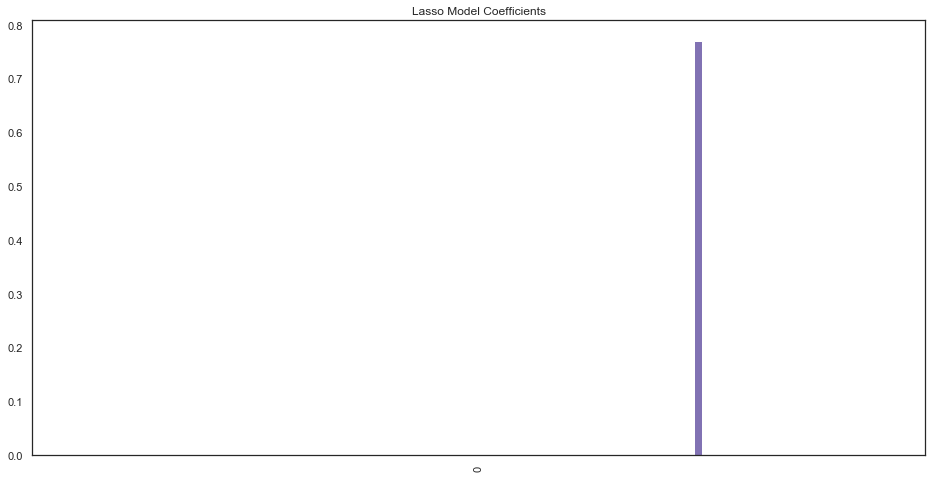

In [147]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8))


In [148]:
outcome = lm.predict(features_selected_test)
predictors = features_selected_train
pred_sum = "+".join(features_selected_train.columns)
formula = outcome + "~" + pred_sum


model = ols(formula= formula, data=data_ols).fit()
model.summary()

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


y = data_fin.price
x = data_fin.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=600, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RMSE test: 26.445
R^2 test: 0.992


In [150]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
50,cleaning_fee,9.483219e-01
52,accommodates,1.567391e-02
48,beds,1.287625e-02
51,med_zillow_price,4.570066e-03
4,hood_BedfordStuyvesant,4.165877e-03
49,bathrooms,3.732953e-03
0,borough_Manhattan,2.515603e-03
13,hood_EastHarlem,2.072747e-03
54,number_of_reviews,1.859598e-03
53,review_scores_rating,1.858685e-03
